## classification

# mijoz noroziligini aniqlash (customer churn)

### biznesda uchraydigan eng dolzarb muammolardan biri bu mijoz noroziligini aniqlash

#### agar biznes egasi mijoz qaytmasligi maxsulot yoki hizmatdan qayta foydalanmasligini bashorat qila olsa mijoz ushlab qolish uchun uning fikrini ozgartirish uchun harakat qilish mumkin 

### online dokon haridorlari malumotlarini tahlil qilish orqali mijozning qolish qolmasligini bashorat qilishimiz mumkin 

## bu bizda binary classificationga togri keladi chunki mijoz qoladi yoki yoqligini aniqlashimiz kerak

In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel('E-Commerce-Dataset.xlsx', sheet_name="E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### bu malumotlar magazinga tashrif buyurgan mijozlar malumoti 
## bu yerda muhim ustun Churn ustuni (1 mijoz ketib qoladi degani) 0 yana qaytadi degan manolarni anglatadi

### Tenure - mijoz necha yildan beri biz bilan birga ekanligi 
### PreferredLoginDevice - qanday qurilmalardan foydalanishi
### PreferedOrderCat - nimalar sotib olasiz
### SatisfactionScore - tizimni baholaysiz
### MaritalStatus - uylangan yoki uylanmaganligi
#### malumotlar judayam kop hammasiga tohtalmaymiz

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [7]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [8]:
churn_rate = df['Churn'].value_counts()/len(df)*100

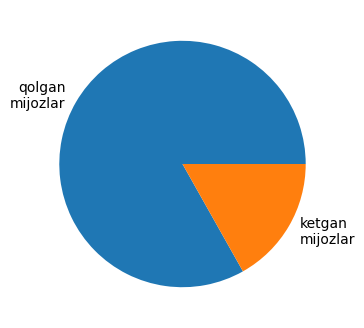

In [9]:
plt.figure(figsize=(4,4))
plt.pie(churn_rate, labels=['qolgan\nmijozlar','ketgan\nmijozlar'])
plt.show()

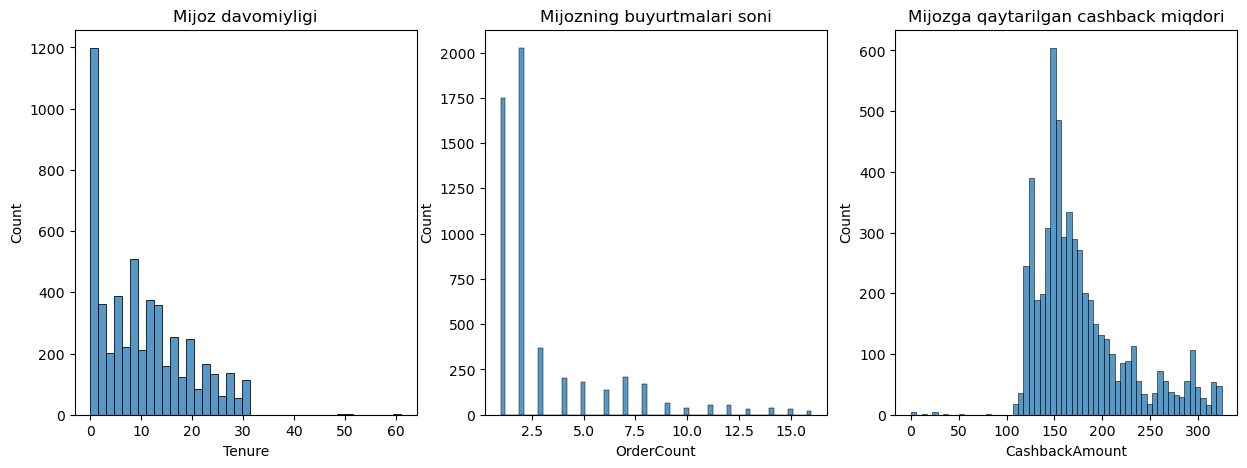

In [10]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

#OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Mijozning buyurtmalari soni")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Mijozga qaytarilgan cashback miqdori")

plt.show()

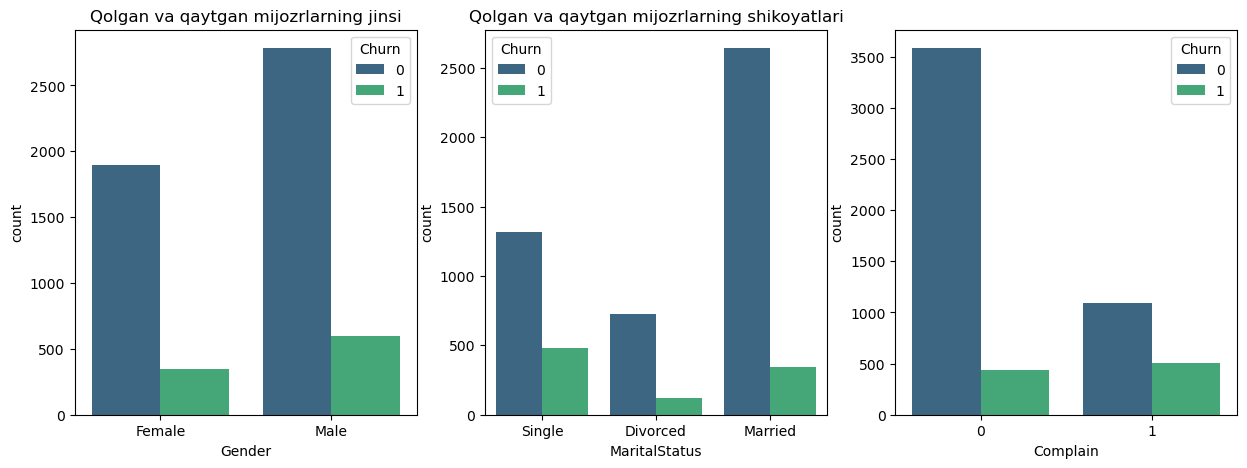

In [11]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning oilaviy xolati")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[1].set_title("Qolgan va qaytgan mijozrlarning shikoyatlari")

plt.show()

In [12]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_37972/1834789899.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Churn']).abs().sort_values(ascending=False)


Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [13]:
#df dagi mavjud bo'lmagan qiymatlar soni
print(f"Mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 1856
Mavjud bo'lmagan qatorlar soni: 1856
Mavjud bo'lmagan qatorlar %: 33.0%


## mavjud bolmaganlar 33% chiqdi bu juda kop shu uchun keraksiz columnlarni tashlab koramiz

In [14]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [15]:
print(f"Mavjud bo'lmagan qiymatlar soni: {data.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(data)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 571
Mavjud bo'lmagan qatorlar soni: 571
Mavjud bo'lmagan qatorlar %: 10.0%


## endi yaxshi lekin 10%ham kop bolishi mumkin bu datani qanchalik kattaligiga qaraydi

In [16]:
data = data.dropna()
data.shape

(5059, 7)

In [17]:
data['Churn'].value_counts()/len(data)

0    0.839296
1    0.160704
Name: Churn, dtype: float64

## Ml tayyorlash

In [18]:
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,159.93,0,0,1,1,0
3,1,0.0,0,3.0,134.07,0,0,1,0,1
4,1,0.0,0,3.0,129.60,0,0,1,0,1
5,1,0.0,1,7.0,139.19,0,0,1,1,0
8,1,13.0,1,2.0,126.83,1,0,0,0,1


In [19]:
X = encoded.drop('Churn', axis=1)
y = encoded['Churn']

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

# ML

## logistic regression

In [22]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

y_pred = LR_model.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
print('model aniqligi: ', metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

model aniqligi:  0.8794466403162056


### model foizi baland chiqqani bilan (1) juda yamon ishlamoqda

## confusion matrix

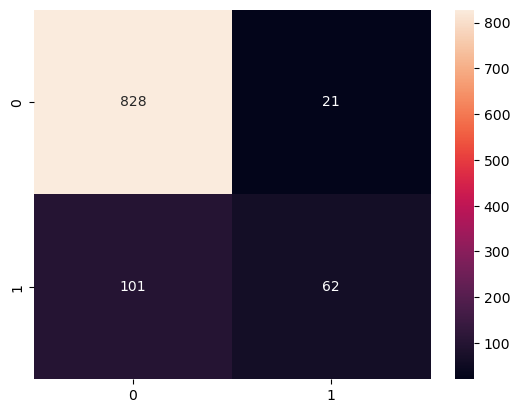

In [23]:
conf_map = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_map, annot=True, fmt='g')
plt.show()

### bu confusion matrixda ham natija judaa yamon

### bularni olchashni yana bir usuli bor 

# roc curve

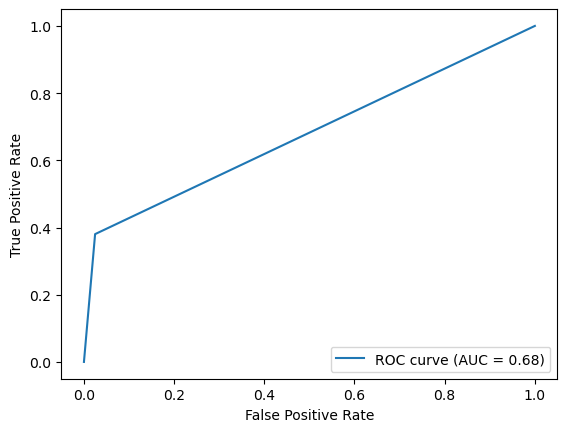

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_aus = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_aus, estimator_name='ROC curve')
display.plot()
plt.show()

## bu chizma nimani chizadi - bu ayanan true_positive bl false_positevni nisbatini chizma qib chiqarib beradi

## hozir bu graif judaa yamon

## uzi eng yomon holatda qiya chiziq tekis 0 dan 1gacha bolib qoladi 

# eng ideal holatda mode 0 dan tepaga tekis tortiladi bu ideal model boldi degani

# endi bu yerda logistic regression modeli togri kelmas ekan!!!

# SUPPORT VECTOR MACHINES

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.67      0.31      0.42       163

    accuracy                           0.86      1012
   macro avg       0.77      0.64      0.67      1012
weighted avg       0.85      0.86      0.84      1012

Model aniqligi: 0.8636363636363636


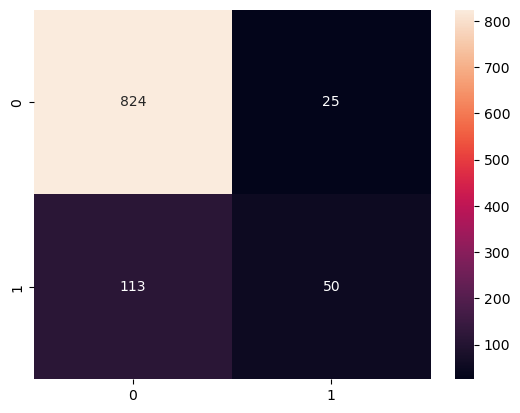

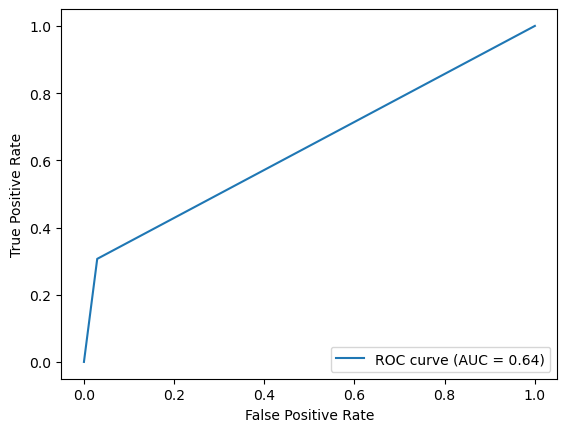

In [25]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# support vector machines ham bu proectda yaxshi natija korsatolmadi

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.85      0.88      0.86       163

    accuracy                           0.96      1012
   macro avg       0.91      0.93      0.92      1012
weighted avg       0.96      0.96      0.96      1012

accuracy_score:  0.9555335968379447


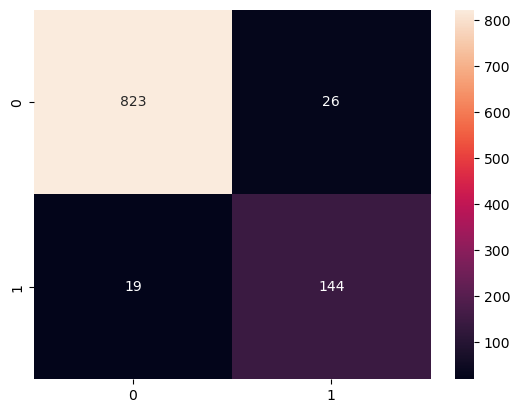

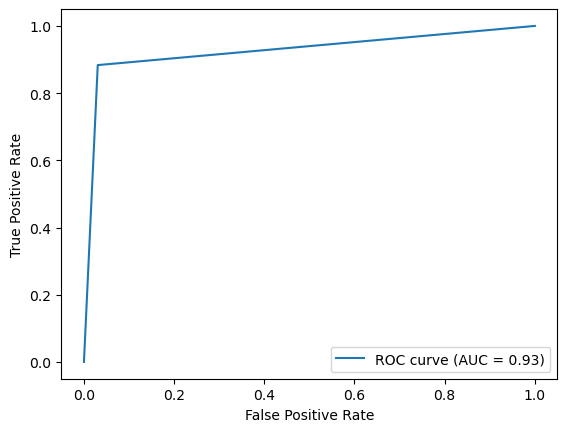

In [26]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

y_pred = tree_model.predict(x_test)
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

## manabuni natija desa boladi

## confusion matrixni ham korishimiz mumkin model juda yaxsih natija berdi

### desicion treeni chizib koramiz

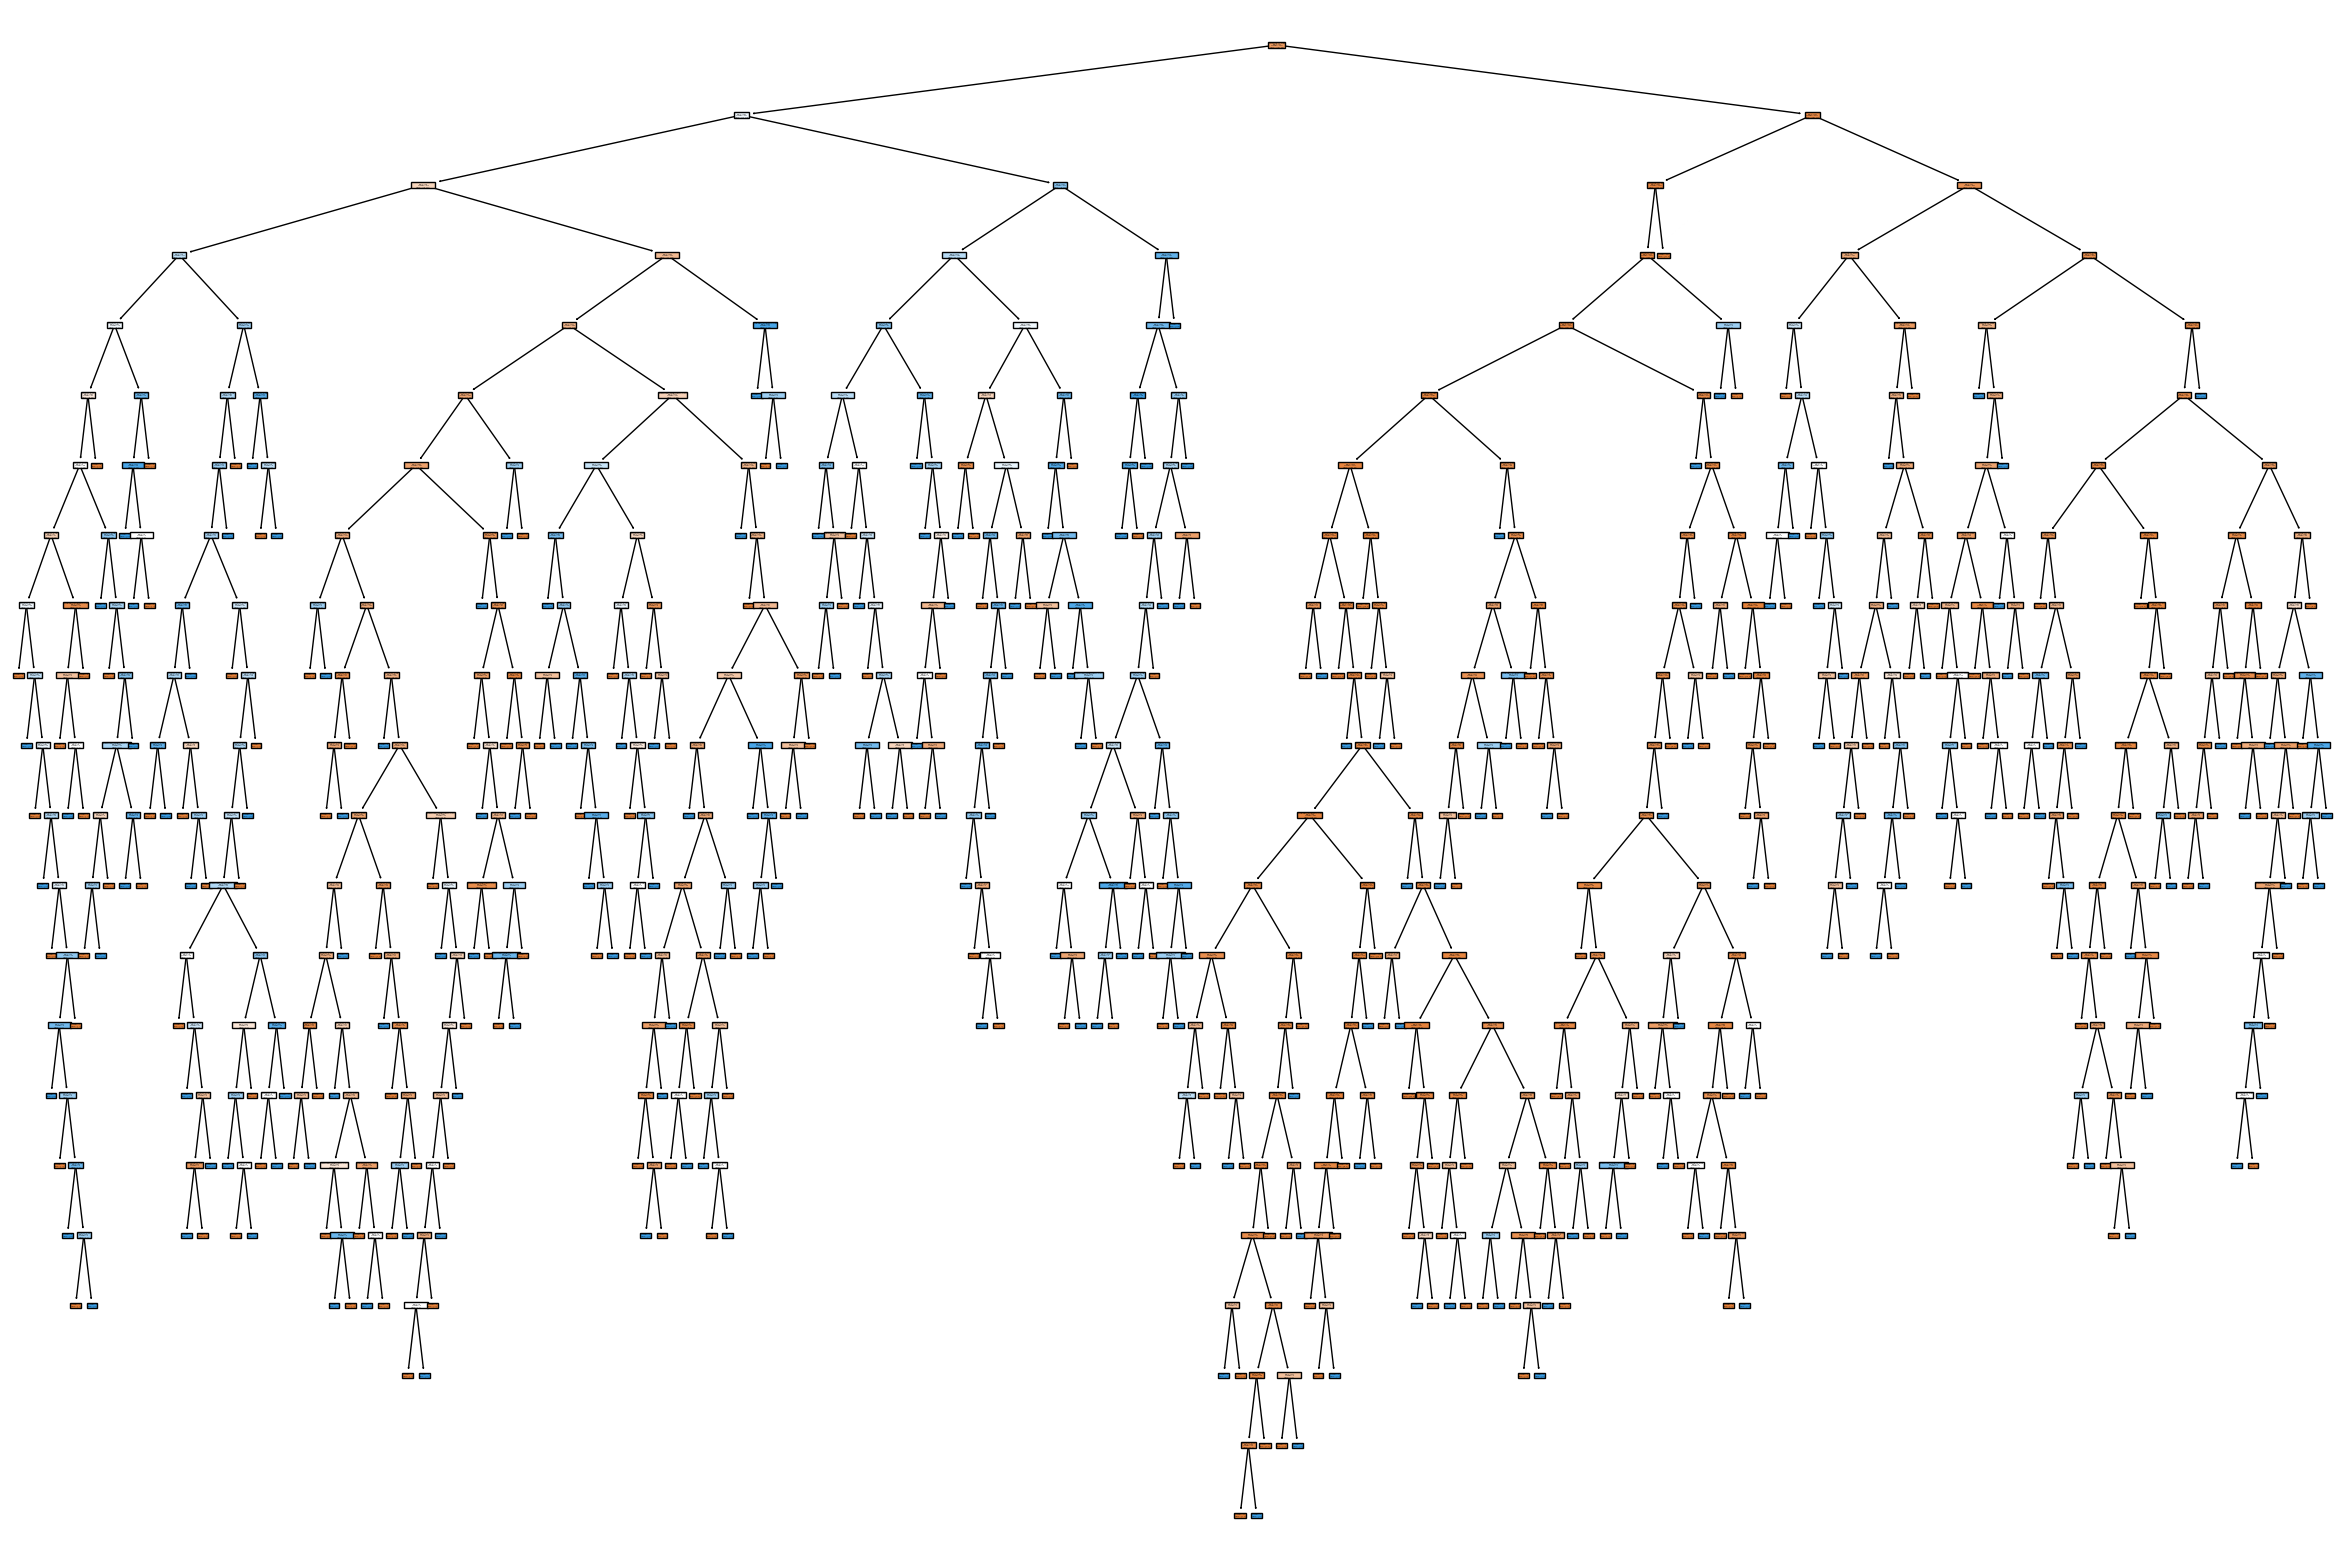

In [27]:
cols = df.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

# agar sizda mijozlar soni 5 6 ming emas balki mln bolsa desecion tree ga max_depht berib daraxtni kamaytirish lozim

In [29]:
param_grid = {'max_depth': np.arange(1,50)}
grid_search = GridSearchCV(tree_model, param_grid, cv=5, n_jobs=1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [30]:
grid_search.best_params_

{'max_depth': 34}

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.84      0.90      0.87       163

    accuracy                           0.96      1012
   macro avg       0.91      0.94      0.92      1012
weighted avg       0.96      0.96      0.96      1012

accuracy_score:  0.9575098814229249


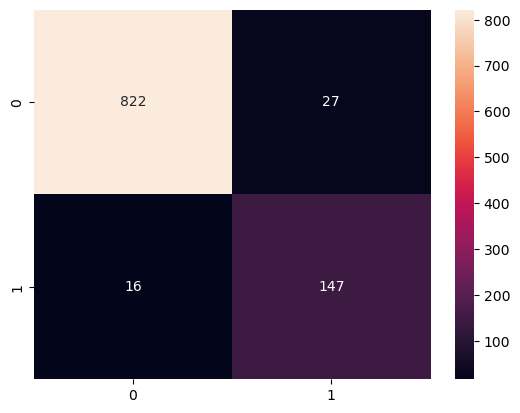

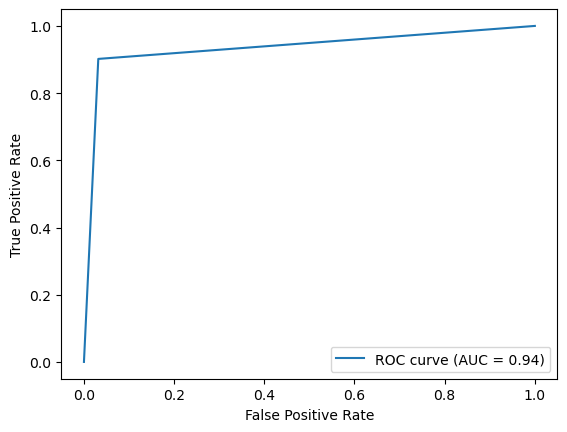

In [31]:
tree_model = DecisionTreeClassifier(max_depth=34)
tree_model.fit(x_train, y_train)

y_pred = tree_model.predict(x_test)
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# random forest

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       849
           1       0.87      0.82      0.85       163

    accuracy                           0.95      1012
   macro avg       0.92      0.90      0.91      1012
weighted avg       0.95      0.95      0.95      1012

accuracy_score:  0.9515810276679841


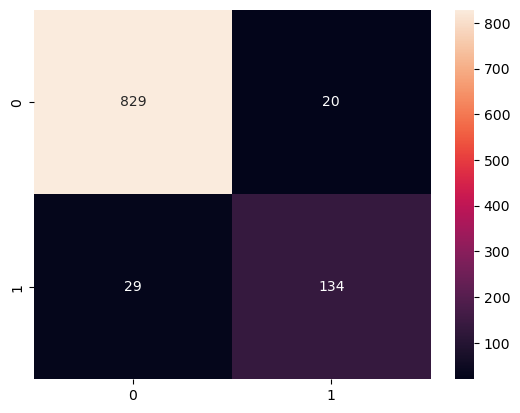

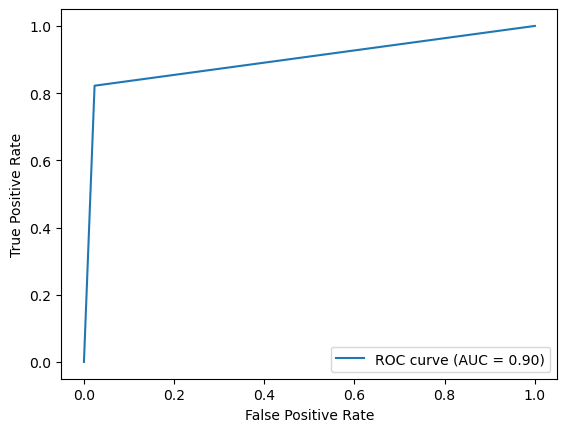

In [33]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.86      0.78      0.82       163

    accuracy                           0.94      1012
   macro avg       0.91      0.88      0.89      1012
weighted avg       0.94      0.94      0.94      1012

Model aniqligi: 0.9436758893280632


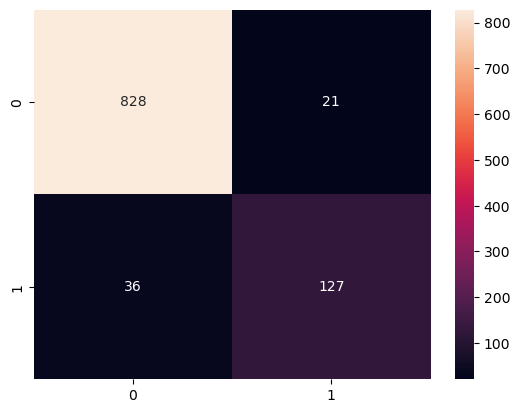

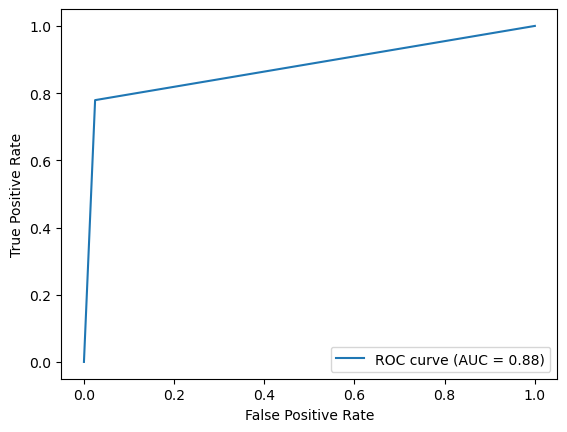

In [35]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(x_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()